In [6]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ssri_interactions.config import Config, ExperimentInfo
from ssri_interactions.plots.heatmaps import similarity_map
from ssri_interactions.plots.umap import plot_umap
from ssri_interactions.io import load_derived_generic

In [7]:
# sns.set_theme(context="paper", style="ticks", font_scale=1.5)

In [51]:
# load PSTH and F1 Scores

df_counts = pd.read_parquet(Config.derived_data_dir / "baseshock_counts_psth.parquet")
df_psth_sal = (
    df_counts.query("group == 'SAL'")
    .pivot_table(index="bin", columns="neuron_id", values="zcounts")
)
df_psth_cit = (
    df_counts.query("group == 'CIT'")
    .pivot_table(index="bin", columns="neuron_id", values="zcounts")
)

df_f1_pop = load_derived_generic(
    "decoding/fs_fast - pop.csv"
)

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x28b02bbb0>)

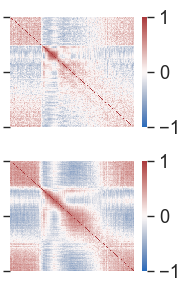

In [32]:
f = plt.figure(figsize=(2, 3.3))

ax_sal, ax_cit = f.subplots(2, 1, gridspec_kw=dict(hspace=0.3))

similarity_map(
    df_binned_piv=df_psth_sal,
    z=True, 
    ax=ax_sal,
    heatmap_kwargs=dict(cmap="vlag", vmin=-1, vmax=1, robust=True)
    )

similarity_map(
    df_binned_piv=df_psth_cit,
    z=True, 
    ax=ax_cit,
    heatmap_kwargs=dict(cmap="vlag", vmin=-1, vmax=1, robust=True)
    )

(<AxesSubplot: >, <matplotlib.colorbar.Colorbar at 0x28b601820>)

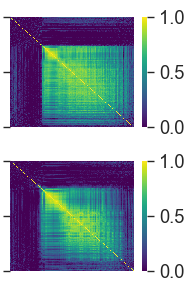

In [36]:
f = plt.figure(figsize=(2, 3.3))
ax_sal, ax_cit = f.subplots(2, 1, gridspec_kw=dict(hspace=0.3))

similarity_map(
    df_binned_piv=df_psth_sal,
    z=False, 
    ax=ax_sal,
    heatmap_kwargs=dict(cmap="viridis", vmin=0, vmax=1, robust=True)
    )

similarity_map(
    df_binned_piv=df_psth_cit,
    z=False, 
    ax=ax_cit,
    heatmap_kwargs=dict(cmap="viridis", vmin=0, vmax=1, robust=True)
    )

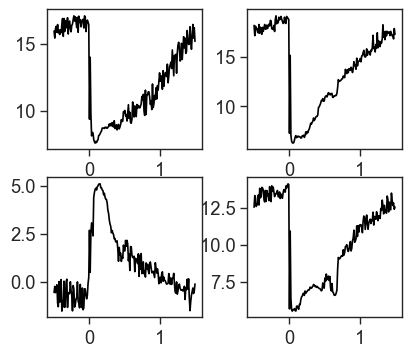

In [49]:
# Plot UMAP
from ssri_interactions.umap import umap_spikes

def plot_umap_ts(df, f, time_col="bin", dim1_col="d1", dim2_col="d2", **plot_kwargs):
    ax1, ax2 = f.subplots(2, 1)
    ax1.plot(df[time_col], df[dim1_col], **plot_kwargs)
    ax2.plot(df[time_col], df[dim2_col], **plot_kwargs)


df_umap_sal = umap_spikes(df_psth_sal)
df_umap_cit = umap_spikes(df_psth_cit)

f = plt.figure(figsize=(4, 4))
f_sal, f_cit = f.subfigures(ncols=2)


plot_umap_ts(df_umap_sal, f_sal, color="black")
plot_umap_ts(df_umap_cit, f_cit, color="black")





In [52]:
# Plot f1 score line plots offset

df_f1_pop

,pop_true,shuffle,session_name
0,0.487934,0.421576,hamilton_01
1,0.563757,0.421481,hamilton_02
2,0.477244,0.421100,hamilton_13
3,0.522910,0.411239,hamilton_14
4,0.740075,0.420395,hamilton_23
5,0.571023,0.421632,hamilton_07
6,0.788009,0.422287,hamilton_08
7,0.813153,0.421616,hamilton_19
8,0.755756,0.422288,hamilton_20
